In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (18, 12)

import subtle.utils.io as suio
import subtle.subtle_preprocess as supre
import numpy as np
from glob import glob
from tqdm import tqdm_notebook as tqdm
import os

def multi_contrast_scaling(case, pp_base):
    p = {'h5_key': 'all'}
    data_t1 = suio.load_file('{}/{}.h5'.format(pp_base.replace('_t2_fl', '_fl'), case), params=p)
    data_t2 = suio.load_file('{}/{}_T2.h5'.format(pp_base, case), params=p)
    data_fl = suio.load_file('{}/{}_FLAIR.h5'.format(pp_base, case), params=p)
    
    data = np.zeros((data_t1.shape[0], data_t1.shape[1], 5, data_t1.shape[3], data_t1.shape[4]))
    
    data[:, :, :3] = data_t1[:, :, :3]
    data[:, :, 3] = data_t2
    data[:, :, 4] = data_fl

    mask_means = data[1].mean(axis=(0, 2, 3))
    
    for c in range(5):
        for m in range(2):
            data[m, :, c] = data[m, :, c] / mask_means[c]
            data[m, :, c] = data[m, :, c] / data[m, :, c].max()
    
    suio.save_data_h5('{}/{}_sc.h5'.format(pp_base, case), data=data[0], data_mask=data[1])

/home/srivathsa/projects/SubtleGad/train/subtle/utils/hyperparameter.py:8: UserWarning: Module test_tube not found - hyperparameter related functions cannot be used
  warnings.warn('Module test_tube not found - hyperparameter related functions cannot be used')


<Figure size 432x288 with 0 Axes>

In [13]:
pp_base = '/home/srivathsa/projects/studies/gad/tiantan/preprocess/data_t2_fl/rscale'
cases = sorted([f.split('/')[-1].replace('_meta.h5', '') for f in glob('{}/*_meta.h5'.format(pp_base))])

for case in tqdm(cases, total=len(cases)):
#     multi_contrast_scaling(case, pp_base)
#     os.remove('{}/{}.h5'.format(pp_base, case))
    os.rename('{}/{}_sc.h5'.format(pp_base, case), '{}/{}.h5'.format(pp_base, case))

In [7]:
case = 'NO57'
sl = 113
# data = suio.load_file('/home/srivathsa/projects/studies/gad/tiantan/preprocess/data_t2_fl/{}.h5'.format(case),
#                       params={'h5_key': 'all'})
# data_t2 = suio.load_file('/home/srivathsa/projects/studies/gad/tiantan/preprocess/data_t2_fl/{}_T2.h5'.format(case),
#                    params={'h5_key': 'all'})
# data_fl = suio.load_file('/home/srivathsa/projects/studies/gad/tiantan/preprocess/data_t2_fl/{}_FLAIR.h5'.format(case),
#                    params={'h5_key': 'all'})

In [8]:
multi_contrast_scaling('NO57', '/home/srivathsa/projects/studies/gad/tiantan/preprocess/data_t2_fl')

In [9]:
data = suio.load_file('/home/srivathsa/projects/studies/gad/tiantan/preprocess/data_t2_fl/NO57_sc.h5', 
                      params={'h5_key': 'all'})
t1pre = data[0, :, 0]
t1low = data[0, :, 1]
t1post = data[0, :, 2]
# t2 = data_t2[0]
# fl = data_fl[0]
t2 = data[0, :, 3]
fl = data[0, :, 4]

t1pre_m = data[1, :, 0]
t1low_m = data[1, :, 1]
t1post_m = data[1, :, 2]
# t2_m = data_t2[1]
# fl_m = data_fl[1]
t2_m = data[1, :, 3]
fl_m = data[1, :, 4]

# t1pre_norm = t1pre / t1pre_m.mean()
# t1low_norm = t1low / t1low_m.mean()
# t1post_norm = t1post / t1post_m.mean()
# t2_norm = t2 / t2_m.mean()
# fl_norm = fl / fl_m.mean()

t1pre_norm = t1pre.copy()
t1low_norm = t1low.copy()
t1post_norm = t1post.copy()
t2_norm = t2.copy()
fl_norm = fl.copy()

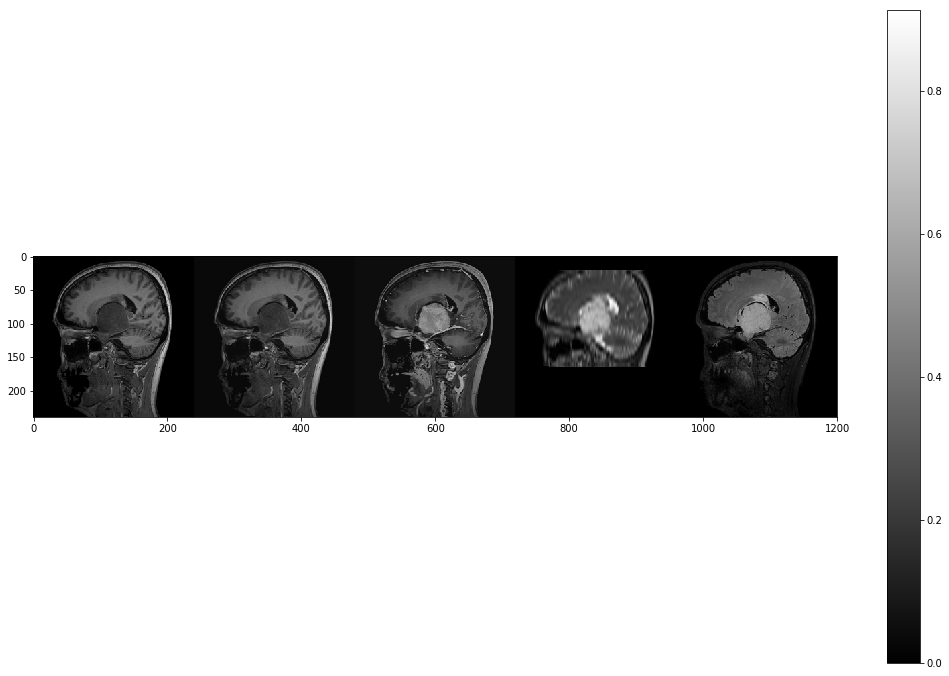

In [10]:
plt.imshow(np.hstack([t1pre_norm[sl], t1low_norm[sl], t1post_norm[sl], t2_norm[sl], fl_norm[sl]]))
plt.colorbar()
# plt.imshow(np.hstack([t1pre[sl], t1low[sl], t1post[sl], t2[sl], fl[sl]]))

0.11815962085253251 0.6422182208381738 0.46797830416937897
0.37588269426706744 0.7060364060386277 0.6080411252242182
0.20703007275072016 0.6072743127346467 0.5170513856067869


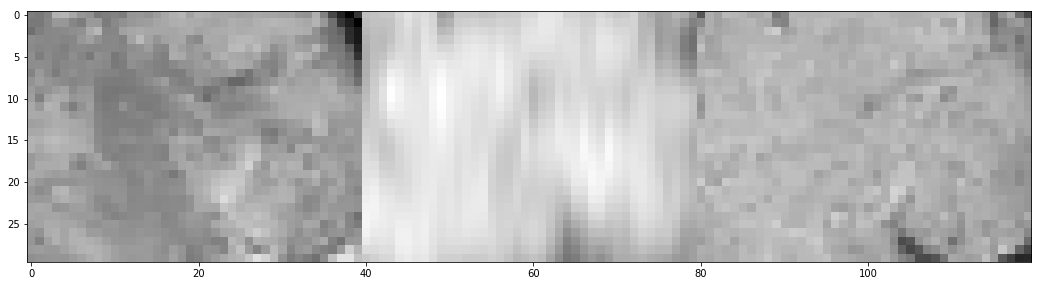

In [11]:
x1, x2 = (80, 110)
y1, y2 = (100, 140)
patch1 = t1post_norm[sl, x1:x2, y1:y2]
patch2 = t2_norm[sl, x1:x2, y1:y2]
patch3 = fl_norm[sl, x1:x2, y1:y2]

# patch1 = t1post[sl, 80:110, 100:140]
# patch2 = t2[sl, 80:110, 100:140]
# patch3 = fl[sl, 80:110, 100:140]

print(patch1.min(), patch1.max(), patch1.mean())
print(patch2.min(), patch2.max(), patch2.mean())
print(patch3.min(), patch3.max(), patch3.mean())
plt.imshow(np.hstack([patch1, patch2, patch3]))

In [ ]:
uad = np.load('/home/srivathsa/projects/studies/gad/tiantan/preprocess/uad_masks_fl/NO57.npy')
uad = np.clip(uad, 0.1, uad.max())
print(uad.shape)
print(uad.min(), uad.max())

In [ ]:
plt.imshow(uad[sl])
plt.colorbar()

In [14]:
t1_base = '/home/srivathsa/projects/studies/gad/tiantan/preprocess/data'
mc_base = '/home/srivathsa/projects/studies/gad/tiantan/preprocess/data_t2_fl/indiv_t2_fl'
dest_path = '/home/srivathsa/projects/studies/gad/tiantan/preprocess/data_t2_fl/old_scaling'

cases = sorted([
    f.split('/')[-1].replace('.h5', '')
    for f in glob('/home/srivathsa/projects/studies/gad/tiantan/preprocess/data_t2_fl/*.h5')
    if 'meta' not in f
])

h5_params = {'h5_key': 'all'}

for case in tqdm(cases, total=len(cases)):
    t1_vol = suio.load_file('{}/{}.h5'.format(t1_base, case), params=h5_params)
    t1_pre = t1_vol[0, :, 0]
    t2_vol = suio.load_file('{}/{}_T2.h5'.format(mc_base, case), params=h5_params)
    fl_vol = suio.load_file('{}/{}_FLAIR.h5'.format(mc_base, case), params=h5_params)
    
    t2_vol_full = np.interp(t2_vol[0], (t2_vol[0].min(), t2_vol[0].max()), (t1_pre.min(), t1_pre.max()))
    t2_vol_mask = np.interp(t2_vol[1], (t2_vol[1].min(), t2_vol[1].max()), (t1_pre.min(), t1_pre.max()))
    
    fl_vol_full = np.interp(fl_vol[0], (fl_vol[0].min(), fl_vol[0].max()), (t1_pre.min(), t1_pre.max()))
    fl_vol_mask = np.interp(fl_vol[1], (fl_vol[1].min(), fl_vol[1].max()), (t1_pre.min(), t1_pre.max()))
    
    mc_vol = np.zeros((t1_vol.shape[1], 5, 240, 240))
    mc_vol_mask = np.zeros((t1_vol.shape[1], 5, 240, 240))
    
    mc_vol[:, :3] = t1_vol[0, :, :3]
    mc_vol[:, 3] = t2_vol_full
    mc_vol[:, 4] = fl_vol_full
    
    mc_vol_mask[:, :3] = t1_vol[1, :, :3]
    mc_vol_mask[:, 3] = t2_vol_mask
    mc_vol_mask[:, 4] = fl_vol_mask
    
    suio.save_data_h5('{}/{}.h5'.format(dest_path, case), data=mc_vol, data_mask=mc_vol_mask)

/home/srivathsa/miniconda3/envs/py35gad/lib/python3.6/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


  0%|          | 0/72 [00:00<?, ?it/s]